# Weather station relevant for every Air Quality station

The objective of this step in the TFM study is to identify the Weather stations which has bigger influence to every AirQuality station, and in this way link the data of AirQuality to the Weather conditions.

For this analysis the different stations have been plotted, to get a visual reference of the both distribution, and after, using ecludian distance from scipy library this relationship between both station types has been calculated.

In [1]:
#Libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import csv

In [2]:
#Uploading stations in dataframes
dfweather = pd.read_excel("../data/interim/Estaciones_control_datos_meteorologicos.xls")
dfair = pd.read_excel("../data/interim/Estaciones_red_calidad_aire.xls")

In [3]:
dfweather.head()

,CÓDIGO_CORTO,LONGITUD,LATITUD
0,4,-3.712257,40.423882
1,8,-3.682316,40.421553
2,16,-3.639242,40.440046
3,18,-3.731836,40.394782
4,24,-3.747345,40.419358


In [4]:
dfweather.shape

(26, 3)

In [5]:
dfair.head()

,CODIGO_CORTO,LONGITUD,LATITUD
0,4,-3.712257,40.423882
1,8,-3.682316,40.421553
2,11,-3.677349,40.451473
3,16,-3.639242,40.440046
4,17,-3.713317,40.347147


In [6]:
dfair.shape

(24, 3)

Text(0, 0.5, 'Latitud')

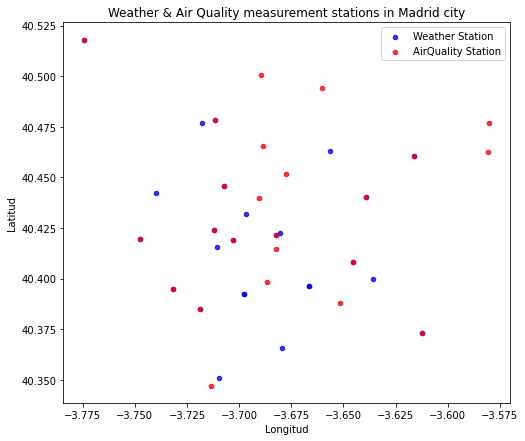

In [7]:
#Plot both stations types to get first insight about location

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dfweather.LONGITUD, dfweather.LATITUD, zorder=1, alpha= 0.8, c='b', s=20, label='Weather Station')
ax.scatter(dfair.LONGITUD, dfair.LATITUD, zorder=1, alpha= 0.8, c='r', s=20, label='AirQuality Station')
ax.legend()
ax.set_title('Weather & Air Quality measurement stations in Madrid city')
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")




In [8]:
air=dfair.to_numpy()
weather=dfweather.to_numpy()

In [9]:
weather

array([[  4.        ,  -3.7122567 ,  40.4238823 ],
       [  8.        ,  -3.6823158 ,  40.4215533 ],
       [ 16.        ,  -3.6392422 ,  40.4400457 ],
       [ 18.        ,  -3.7318356 ,  40.3947825 ],
       [ 24.        ,  -3.7473445 ,  40.4193577 ],
       [ 35.        ,  -3.7031662 ,  40.4192091 ],
       [ 36.        ,  -3.6453104 ,  40.4079517 ],
       [ 38.        ,  -3.7071303 ,  40.4455439 ],
       [ 39.        ,  -3.7115364 ,  40.4782322 ],
       [ 54.        ,  -3.6121394 ,  40.3730118 ],
       [ 56.        ,  -3.7187679 ,  40.3850336 ],
       [ 58.        ,  -3.7746101 ,  40.5180701 ],
       [ 59.        ,  -3.6163407 ,  40.4607255 ],
       [102.        ,  -3.63563705,  40.39979278],
       [103.        ,  -3.70952476,  40.3506278 ],
       [104.        ,  -3.679722  ,  40.3658333 ],
       [106.        ,  -3.74      ,  40.442222  ],
       [107.        ,  -3.656667  ,  40.462778  ],
       [108.        ,  -3.717881  ,  40.4766333 ],
       [109.        ,  -3.69695

In [10]:
air

array([[ 4.       , -3.7122567, 40.4238823],
       [ 8.       , -3.6823158, 40.4215533],
       [11.       , -3.6773491, 40.4514734],
       [16.       , -3.6392422, 40.4400457],
       [17.       , -3.7133167, 40.347147 ],
       [18.       , -3.7318356, 40.3947825],
       [24.       , -3.7473445, 40.4193577],
       [27.       , -3.5800258, 40.4769179],
       [35.       , -3.7031662, 40.4192091],
       [36.       , -3.6453104, 40.4079517],
       [38.       , -3.7071303, 40.4455439],
       [39.       , -3.7115364, 40.4782322],
       [40.       , -3.6515286, 40.3881478],
       [47.       , -3.6868138, 40.3980991],
       [48.       , -3.6903729, 40.4398904],
       [49.       , -3.6824999, 40.4144444],
       [50.       , -3.6887449, 40.4655841],
       [54.       , -3.6121394, 40.3730118],
       [55.       , -3.5805649, 40.4623628],
       [56.       , -3.7187679, 40.3850336],
       [57.       , -3.6605173, 40.4942012],
       [58.       , -3.7746101, 40.5180701],
       [59

In [11]:
dfair.set_index("CODIGO_CORTO", inplace=True)
dfweather.set_index("CÓDIGO_CORTO", inplace=True)

In [12]:
dfair.head()

,LONGITUD,LATITUD
CODIGO_CORTO,,
4,-3.712257,40.423882
8,-3.682316,40.421553
11,-3.677349,40.451473
16,-3.639242,40.440046
17,-3.713317,40.347147


In [13]:
dfweather.head()

,LONGITUD,LATITUD
CÓDIGO_CORTO,,
4,-3.712257,40.423882
8,-3.682316,40.421553
16,-3.639242,40.440046
18,-3.731836,40.394782
24,-3.747345,40.419358


In [14]:
#Creating matrix with the distance between every weather stations to every Air station
#Distance function will be used from scipy, using euclidean distance

from scipy.spatial import distance

ary = scipy.spatial.distance.cdist(dfair.iloc[:,1:], dfweather.iloc[:,1:], metric='euclidean')
pd.DataFrame(ary)



,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.002329,0.016163,0.029100,0.004525,0.004673,0.015931,0.021662,0.054350,0.050871,...,0.018340,0.038896,0.052751,0.008029,0.008282,0.001233,0.027410,0.027410,0.031338,0.031338
1,0.002329,0.000000,0.018492,0.026771,0.002196,0.002344,0.013602,0.023991,0.056679,0.048542,...,0.020669,0.041225,0.055080,0.010358,0.005953,0.001096,0.025081,0.025081,0.029009,0.029009
2,0.027591,0.029920,0.011428,0.056691,0.032116,0.032264,0.043522,0.005929,0.026759,0.078462,...,0.009251,0.011305,0.025160,0.019562,0.035873,0.028824,0.055001,0.055001,0.058929,0.058929
3,0.016163,0.018492,0.000000,0.045263,0.020688,0.020837,0.032094,0.005498,0.038187,0.067034,...,0.002176,0.022732,0.036588,0.008135,0.024446,0.017397,0.043574,0.043574,0.047501,0.047501
4,0.076735,0.074406,0.092899,0.047635,0.072211,0.072062,0.060805,0.098397,0.131085,0.025865,...,0.095075,0.115631,0.129486,0.084764,0.068453,0.075502,0.049325,0.049325,0.045397,0.045397
5,0.029100,0.026771,0.045263,0.000000,0.024575,0.024427,0.013169,0.050761,0.083450,0.021771,...,0.047439,0.067996,0.081851,0.037129,0.020817,0.027867,0.001689,0.001689,0.002238,0.002238
6,0.004525,0.002196,0.020688,0.024575,0.000000,0.000149,0.011406,0.026186,0.058875,0.046346,...,0.022864,0.043420,0.057276,0.012553,0.003758,0.003291,0.022886,0.022886,0.026813,0.026813
7,0.053036,0.055365,0.036872,0.082135,0.057560,0.057709,0.068966,0.031374,0.001314,0.103906,...,0.034696,0.014140,0.000285,0.045007,0.061318,0.054269,0.080446,0.080446,0.084374,0.084374
8,0.004673,0.002344,0.020837,0.024427,0.000149,0.000000,0.011257,0.026335,0.059023,0.046197,...,0.023013,0.043569,0.057424,0.012702,0.003609,0.003440,0.022737,0.022737,0.026665,0.026665
9,0.015931,0.013602,0.032094,0.013169,0.011406,0.011257,0.000000,0.037592,0.070281,0.034940,...,0.034270,0.054826,0.068682,0.023959,0.007648,0.014697,0.011480,0.011480,0.015407,0.015407


In [15]:
ary

array([[0.0000000e+00, 2.3290000e-03, 1.6163400e-02, 2.9099800e-02,
        4.5246000e-03, 4.6732000e-03, 1.5930600e-02, 2.1661600e-02,
        5.4349900e-02, 5.0870500e-02, 3.8848700e-02, 9.4187800e-02,
        3.6843200e-02, 2.4089520e-02, 7.3254500e-02, 5.8049000e-02,
        1.8339700e-02, 3.8895700e-02, 5.2751000e-02, 8.0288000e-03,
        8.2823000e-03, 1.2332000e-03, 2.7410300e-02, 2.7410300e-02,
        3.1337900e-02, 3.1337900e-02],
       [2.3290000e-03, 0.0000000e+00, 1.8492400e-02, 2.6770800e-02,
        2.1956000e-03, 2.3442000e-03, 1.3601600e-02, 2.3990600e-02,
        5.6678900e-02, 4.8541500e-02, 3.6519700e-02, 9.6516800e-02,
        3.9172200e-02, 2.1760520e-02, 7.0925500e-02, 5.5720000e-02,
        2.0668700e-02, 4.1224700e-02, 5.5080000e-02, 1.0357800e-02,
        5.9533000e-03, 1.0958000e-03, 2.5081300e-02, 2.5081300e-02,
        2.9008900e-02, 2.9008900e-02],
       [2.7591100e-02, 2.9920100e-02, 1.1427700e-02, 5.6690900e-02,
        3.2115700e-02, 3.2264300e-02, 

In [16]:
dfair.shape

(24, 2)

In [17]:
dfair.index.to_list()

[4,
 8,
 11,
 16,
 17,
 18,
 24,
 27,
 35,
 36,
 38,
 39,
 40,
 47,
 48,
 49,
 50,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [18]:
type(pd.DataFrame(ary))

pandas.core.frame.DataFrame

In [19]:
dfdistance= pd.DataFrame(ary)

In [20]:
#Create index for weather stations based on their unique id (="CODIGO-UNICO")
dfdistance.columns=dfweather.index.to_list()
dfdistance.head()

,4,8,16,18,24,35,36,38,39,54,...,106,107,108,109,110,111,112,113,114,115
0,0.000000,0.002329,0.016163,0.029100,0.004525,0.004673,0.015931,0.021662,0.054350,0.050871,...,0.018340,0.038896,0.052751,0.008029,0.008282,0.001233,0.027410,0.027410,0.031338,0.031338
1,0.002329,0.000000,0.018492,0.026771,0.002196,0.002344,0.013602,0.023991,0.056679,0.048542,...,0.020669,0.041225,0.055080,0.010358,0.005953,0.001096,0.025081,0.025081,0.029009,0.029009
2,0.027591,0.029920,0.011428,0.056691,0.032116,0.032264,0.043522,0.005929,0.026759,0.078462,...,0.009251,0.011305,0.025160,0.019562,0.035873,0.028824,0.055001,0.055001,0.058929,0.058929
3,0.016163,0.018492,0.000000,0.045263,0.020688,0.020837,0.032094,0.005498,0.038187,0.067034,...,0.002176,0.022732,0.036588,0.008135,0.024446,0.017397,0.043574,0.043574,0.047501,0.047501
4,0.076735,0.074406,0.092899,0.047635,0.072211,0.072062,0.060805,0.098397,0.131085,0.025865,...,0.095075,0.115631,0.129486,0.084764,0.068453,0.075502,0.049325,0.049325,0.045397,0.045397


In [21]:
#Create index for air quality stations based on their unique id (="CODIGO-UNICO")
dfdistance.index=dfair.index.to_list()
dfdistance.head()


,4,8,16,18,24,35,36,38,39,54,...,106,107,108,109,110,111,112,113,114,115
4,0.000000,0.002329,0.016163,0.029100,0.004525,0.004673,0.015931,0.021662,0.054350,0.050871,...,0.018340,0.038896,0.052751,0.008029,0.008282,0.001233,0.027410,0.027410,0.031338,0.031338
8,0.002329,0.000000,0.018492,0.026771,0.002196,0.002344,0.013602,0.023991,0.056679,0.048542,...,0.020669,0.041225,0.055080,0.010358,0.005953,0.001096,0.025081,0.025081,0.029009,0.029009
11,0.027591,0.029920,0.011428,0.056691,0.032116,0.032264,0.043522,0.005929,0.026759,0.078462,...,0.009251,0.011305,0.025160,0.019562,0.035873,0.028824,0.055001,0.055001,0.058929,0.058929
16,0.016163,0.018492,0.000000,0.045263,0.020688,0.020837,0.032094,0.005498,0.038187,0.067034,...,0.002176,0.022732,0.036588,0.008135,0.024446,0.017397,0.043574,0.043574,0.047501,0.047501
17,0.076735,0.074406,0.092899,0.047635,0.072211,0.072062,0.060805,0.098397,0.131085,0.025865,...,0.095075,0.115631,0.129486,0.084764,0.068453,0.075502,0.049325,0.049325,0.045397,0.045397


Introduce weather station code to check distance:  106


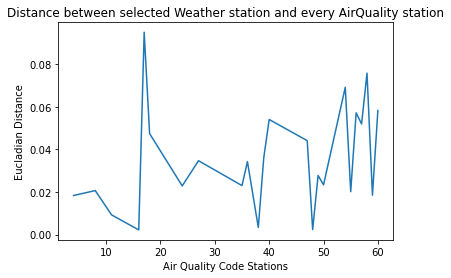

In [22]:
#Plotting the distances to visualize the relation for differet Weather stations

ws = float (input ("Introduce weather station code to check distance:  "))

plt.title("Distance between selected Weather station and every AirQuality station") 
plt.xlabel("Air Quality Code Stations")                              
plt.ylabel("Eucladian Distance")     
plt.plot(dfdistance[ws]);

In [23]:
dfdistance[106].idxmin()

16

In [24]:
# Matrix (created on python dictionary) to identify the closer Weather station to every AirQuality station

dicW4A_station = dict ((columns_i, dfdistance[columns_i].idxmin())for columns_i in dfdistance.columns)
dicW4A_station

{4: 4,
 8: 8,
 16: 16,
 18: 18,
 24: 24,
 35: 35,
 36: 36,
 38: 38,
 39: 39,
 54: 54,
 56: 56,
 58: 58,
 59: 59,
 102: 47,
 103: 17,
 104: 54,
 106: 16,
 107: 55,
 108: 27,
 109: 48,
 110: 49,
 111: 8,
 112: 47,
 113: 47,
 114: 18,
 115: 18}

In [25]:
type(dicW4A_station)

dict

In [26]:
#Creating Reference table to identify the weather stations data to be link with every Air Station
dfW4A_station=pd.DataFrame.from_dict(data=dicW4A_station, orient='index')
dfW4A_station.index.name='WeatherStationCode'
dfW4A_station.to_csv("../data/interim/Ref_file_WeatherStations4AirStations.csv", header=["AirStationCode"])